## Introduction
The nuclei detection is usually the first step in the medical diagnosis. But there are usually more than one cells in Electron microscope images

# Abstract

In this paper I managed CNN models to find the location of each nuclei in a histopathological image which has multiple cells. The principle is to divide each pixel into two categories—inside the cell and the background. By predict each pixel inside or outside(background), we can according to the run length encoding file to generate the black and white image to indicate the location of a certain cell. This method reduces the manual work to mark out the individual cell nucleus in a microscope picture. Then calculate the accuracy of the prediction of location of the cell nucleus.
I applied the CNN to the medical image dataset, and tried to build different architectures and tuned the parameters to have a higher score of the model value and better precision of the location.


# Models explanation
1. withtout max plooing, without dropout layer

2. with max pooling, without druopout layer

3. without max pooling, with dropout layer

# Dataset pre-process
This dataset is the digital microscope pictures and marks of the individual cell by human hand.
The dataset has about 675 images for training and 65 images for testing.
I used the 675 images with their masks for training for the first time, it took two hours to run 10 epochs. So I chose 169 images for training and 75 images for testing.
To load multiple images in every folder has different pathname.

# Summary of the result
The highest accuracy of 3 models
1. model1: 0.9528  
2. model2: 0.8962  
3. model3:0.1339

# References
data come from https://www.kaggle.com/c/data-science-bowl-2018/data
the main architecture of the code comes from  https://www.kaggle.com/kmader/nuclei-overview-to-submission

In [27]:
import findspark
findspark.init()
import pyspark

In [4]:
#from settings import PROJECT_ROOT
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
import os as os
from socket import socket
import glob
import numpy as np
from skimage.io import imread
import seaborn as sns
import IPython.display as dp

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# read the labels
train_labels = pd.read_csv("C:/D/7245/data/stage1_train_label.csv")
train_labels['encodedpixels'] = train_labels['encodedpixels'].map(lambda ep: [int(x) for x in ep.split(' ')])
train_labels.sample(3)

,imageid,encodedpixels
15258,7c0157913223365720209ac83ff2e0b1b2b460173acd61...,"[60751, 13, 61108, 19, 61466, 24, 61825, 31, 6..."
6352,34c9f4eb2af8b8f46b1d88b74bde16f4614cd08948c2f1...,"[21761, 1, 22017, 2, 22273, 3, 22529, 3, 22785..."
8226,4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8...,"[16243, 8, 16495, 14, 16750, 16, 17005, 17, 17..."


In [6]:
imgid=np.array([])

path='C:\\D\\7245\\data\\stage1_train'
for root,dirs,files in os.walk(path):
    for images in files:
        if images.endswith('.png'):
           
            fullpath=path+images
            print(fullpath)
            #print(dirs)
            imgid=np.append(imgid,images)

print(imgid)


C:\D\7245\data\stage1_train00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
C:\D\7245\data\stage1_train07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png
C:\D\7245\data\stage1_train0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png
C:\D\7245\data\stage1_train0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png
C:\D\7245\data\stage1_train0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png
C:\D\7245\data\stage1_train2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png
C:\D\7245\data\stage1_train4afa39f2a05f9884a5ff030d678c6142379f99a5baaf4f1ba7835a639cb50751.png
C:\D\7245\data\stage1_train4bc58dbdefb2777392361d8b2d686b1cc14ca310e009b79763af46e853e6c6ac.png
C:\D\7245\data\stage1_train4e3b49fb14877b63704881a923365b68c1def111c58f23c66daa49fef4b632bf.png
C:\D\7245\data\stage1_train5522143fa8723b66b1e0b25331047e6ae6eeec664f7c8abeba687e0de0f9060a.png
C:\D\7245\data\stage1_train58656859fb9c1

C:\D\7245\data\stage1_train1400420310c9094361a8a243545187f1d4c2365e081b3bb08c5fa29c7491a55b.png
C:\D\7245\data\stage1_train1a299afb4d6dc237f95f32c5844626cca594bfb4415b0d0d5fe70f2c5b7be459.png
C:\D\7245\data\stage1_train560f7185dbec6c9b0888e8e361f92c9b454f6f68bb4ba8673ffebc0826a4cf3a.png
C:\D\7245\data\stage1_train5e9c6d16178aa09d78aa7a9468edeece077d23c1058a6b5fc92188224517be1c.png
C:\D\7245\data\stage1_train5fe07c8d1036cf6dbe10b7f7f48bc8483c10526f29a736319b5a05eca48ca934.png
C:\D\7245\data\stage1_train63a5f0aecf44f5a85d4a020bfac5c433ba9538fc70738192789d66ddb3f40870.png
C:\D\7245\data\stage1_train6ee1dd723a9556b4486cd1e50e6ab45a4e3a43fbd1f702dca77686f42f10ad9b.png
C:\D\7245\data\stage1_train72d62394143917cdb2894ab9b328085cd53c713809e912f972fa769f97f16c83.png
C:\D\7245\data\stage1_train825e6f0d3de292c60a7a7a8fbe118969fe680fb995a7827512123a5e85c13da6.png
C:\D\7245\data\stage1_train8cd342f877ba603533c70eb21816ab9f88b76bdd2805f982b01a2e45f4f60096.png
C:\D\7245\data\stage1_trainae8953eedcd2d

C:\D\7245\data\stage1_train23830d0e51245fc0c9e410efa4c17d2a7d83a0104a3777130119ab892de47a4e.png
C:\D\7245\data\stage1_train068b20dd9b178730bc4fdba050e6d4c33d460aba1f4ab26d281e661aad786513.png
C:\D\7245\data\stage1_train118dbe5cb83e479a50cbfa9f23eb0372dcd6c8015e5d07d2e0aec87cabf03ce1.png
C:\D\7245\data\stage1_train1d0f8044e7f329386d6caef18e8c437471188c2c5ae0a8fb2c4c345809191fe2.png
C:\D\7245\data\stage1_train2173721b0c1d12d054bb8d1d5e8fee5cce9dd0b2ecbd671a6eb9608ad280d6d6.png
C:\D\7245\data\stage1_train27be708159d9684f5df36624806e4fe6b2c81645791ea492c720a3de16239e58.png
C:\D\7245\data\stage1_train287629906f3190919c99e26fb632802e3dc4f12be1ad909607e9a8918ff92fbf.png
C:\D\7245\data\stage1_train2a5ce6f0438d5c7a1d92fef5b822289a4470858c60357c32c093ebb7fff08a4d.png
C:\D\7245\data\stage1_train2b8d3f536aee7f8a19a28ace44aba985d7c0e68562852a4b89a3175e8dea3920.png
C:\D\7245\data\stage1_train361bc28492d8078a9b80f47326bfd6c888cf84bfc057a5875553b73feedb7ee6.png
C:\D\7245\data\stage1_train444bc2cf02069

C:\D\7245\data\stage1_train0f035a8ecc7735f671fe11db75f66c08c9c40b459f15b3076c9c8bb5c11b8995.png
C:\D\7245\data\stage1_train17f2064a95d30e5662948b3c4319b5bf2de2890777489fa5d6e82f03f512e197.png
C:\D\7245\data\stage1_train1814dd43f406efcd421fd8e2ded939dbc0978462eae5c0f9fcdb4ccd3b46fd77.png
C:\D\7245\data\stage1_train20d68f9306a8cfbbc4617670237f7b518393ac70713e02eb79efdbf33ff3a52c.png
C:\D\7245\data\stage1_train46ce0f21e38ab48a75d2fb1814e3bcc7515c8e8f914d3500794c4dbf0331ed5c.png
C:\D\7245\data\stage1_train46ef4c81b478135d887475f62104c940da9556a49bf655cd26b23e97285d0bf0.png
C:\D\7245\data\stage1_train491b6f22d2d8135bcb14d76426f78542e2009c1e6706a856f17ab4c00fad57c2.png
C:\D\7245\data\stage1_train556206046d6f84b71d7fd418762e5e092cd263453a457ec4e6e3fadb487502d3.png
C:\D\7245\data\stage1_train5f2c646734cd0ebe63be9299f96c9779705b80273265366d7eb758c93d5663a3.png
C:\D\7245\data\stage1_train6da3f882a6ca6ed614d23d8cfb985dac35d54e0c38fc8138762c8962bd4568cd.png
C:\D\7245\data\stage1_train7eddfd909be21

C:\D\7245\data\stage1_train020c72baf44d00fa3e093ab2f88adda2f3e77a86fb3a847fabb9a1840c6eaa44.png
C:\D\7245\data\stage1_train0517ffa0e06ea765d635901a3d56e352732b7f9939d2b9c0b7ea801afa960052.png
C:\D\7245\data\stage1_train7b6aabe6616395e926b682749658c8e4465b622144882284b02d450cc7e62631.png
C:\D\7245\data\stage1_train95c15a2c3f47c729d0ee7181cb0fb128fd072196c9214d6d3c8d2b550fa164ce.png
C:\D\7245\data\stage1_train96abce1e40b790e15d1f7cbec1b6c3d4a29db1297d8a2124950b57cdd671e29b.png
C:\D\7245\data\stage1_trainb7348da2f1e38912656a1db53cc70f68552f0c53694e399806fcd68b1d3913b0.png
C:\D\7245\data\stage1_trainbb2077ddf39e78c8057916702f0898ee864ba7ad820c4e991d3671b00b50c1fb.png
C:\D\7245\data\stage1_trainc1d83d741624ecdde3f8c68a0abda55d9d4270e3001f8b7931c15b2ac759fd5d.png
C:\D\7245\data\stage1_trainc76432b07d210cd82cbe9ea472e8b3d4f95c96f545c5128b5cadafc9b159eebc.png
C:\D\7245\data\stage1_traind0f336520c732a38b23196489563f47b54b1bb1e74bd32d144a64fe82d1d8548.png
C:\D\7245\data\stage1_traine96c9120fa134

C:\D\7245\data\stage1_train5419302571113e9aa74c7c0a9575333ca539b871a16c86ee92b35170b4ddc52e.png
C:\D\7245\data\stage1_train1cf9c71753f4f8e45b9803c478744894ee487673246ac8667170f9f6e333cbfe.png
C:\D\7245\data\stage1_train337659897339aad9676c07256539f722324936d73119fe9c9e9c9fae3248b457.png
C:\D\7245\data\stage1_train6c982b9bf7cce67ae8de493d1677885b5270ab66ab24f3988c7253e2c0e46338.png
C:\D\7245\data\stage1_train8698453a1828dc9345169ec5bae4212e3d3f0ef60015f769f9a9beb6835194b7.png
C:\D\7245\data\stage1_train8fdcc86dd93380ffbf7b21ab5d8c153d873c56b1c55747cf9f56dcdc72a877c4.png
C:\D\7245\data\stage1_train9260ca7988e84415c4c398002f13db3ec2f228c28b6b6c207bbcf57854392d59.png
C:\D\7245\data\stage1_traina740d4075f2083807f4137e4addee4bd7fc06bebed77b2dbcf6ea086432ac5aa.png
C:\D\7245\data\stage1_trained0ba854ef4443e2ac4372c93db50ab07d2925a74fe316bcb4c0d834667cde13.png
C:\D\7245\data\stage1_train54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12.png
C:\D\7245\data\stage1_train00d3a57a26802

C:\D\7245\data\stage1_train0156244501980c68cc49b67f4599b7a98025fdbef9b984bc25c6c156b6dbd1c0.png
C:\D\7245\data\stage1_train0455d64d8bcdb3f632958d31ecbf922807583f18598637b3c4066844d420b18b.png
C:\D\7245\data\stage1_train102e767d52191ce8e8ad98dc97360dfc42bdeecaaa8cfaae60e7a243a261c325.png
C:\D\7245\data\stage1_train1046f086ee5d1fc194df28240f5d868eb1c87a247b8ee9a64b9420c0397f5af3.png
C:\D\7245\data\stage1_train1bd515987f2ccc9a2d0eb387f35aac181e5cf009dfbc8584768c9eed6a578f86.png
C:\D\7245\data\stage1_train1cf7c3d74cd6d99b34c302c0f6dfb78af8ee2de325ca1eac1579f1e47b520f61.png
C:\D\7245\data\stage1_train1d1ad3bd29b80e597e39c6520c21fddfbbef664b78e64ffccbadeeca6faba54b.png
C:\D\7245\data\stage1_train1e6f232836073b95e04b72e832bae454bb4321e4f15f963ef90cbcd161320fe6.png
C:\D\7245\data\stage1_train1f6cf8a984b4f6da55d4ec0284c47cbe081e01976e50866196c443f6ee8c9880.png
C:\D\7245\data\stage1_train20466276874b9db882d2d077155c0daab0da23ca0afd999a1827427ffcad5ea8.png
C:\D\7245\data\stage1_train26f26439c5985

C:\D\7245\data\stage1_train0f6b6f7cd9840f17965b4430974ee8427ff73be2d785bf4ad292b49a2532e1d7.png
C:\D\7245\data\stage1_train1018e18f9f951d58d93c63faa9577c7412e4e2ed98436791ae4f0b2abbb82e15.png
C:\D\7245\data\stage1_train22314654d441cc4a7b73321015ffd4f75cde2eda2e7273df3026a57ff99546b3.png
C:\D\7245\data\stage1_train26d34976629416ff48ee508cba55e16cb809322339fbe602e44b63f21f4728db.png
C:\D\7245\data\stage1_train29f52c80f046ee2e997364024ae8e766db2239de16aeef38dc95049b4cc58642.png
C:\D\7245\data\stage1_train2a9af02482440e6d0ec2139d8f156bb225edc72f4d587c000f15b96aa5aafc81.png
C:\D\7245\data\stage1_train3153a0591077efb5963b4ce394f92cd5ce594873a01f33f067c270b9f83d5235.png
C:\D\7245\data\stage1_train328f362481ac1c3476b666e0895c228944840474cc28eb733291bfb6bdf7b15d.png
C:\D\7245\data\stage1_train32ee91c10ebb6d2c589ab68fe4dd6beeb6fad725ca57a06393a1fe807d725ccc.png
C:\D\7245\data\stage1_train34767b4d4da2de192f821b2480b38a379877fa2527468e6f292a5ba9f20f2c16.png
C:\D\7245\data\stage1_train34b252e995a70

C:\D\7245\data\stage1_train0392077908ce26bad423277f0d567fe26a89b0fadf37535cc6c1a9fd93989e24.png
C:\D\7245\data\stage1_train12155ee3e8ba9976487272f216f7d189fbe8bd7290f7c399e0a51820381e1393.png
C:\D\7245\data\stage1_train1436b7530a66634b2acd424ef052fb5e75ddc182c3b6593ff64554e06cf0395f.png
C:\D\7245\data\stage1_train18b3760bc97a730b8c19fc28854698140df4eb14b18ab1a7d943e578efa4468e.png
C:\D\7245\data\stage1_train245297d43a2e4ca54566416ae75814f921e9da7b77bed9d1cfa93f90daa2c2af.png
C:\D\7245\data\stage1_train32adf4548251fc83be1a5d0d236d226959573f94bf70a2d29a1f7af39f62a5d0.png
C:\D\7245\data\stage1_train43aa1aff9b7dc3ab665c2ab705a7686566fac3588784375c9becfe2e7a735ae2.png
C:\D\7245\data\stage1_train458642f8c675664d9727a2759224cdd38816ce6c1f042f0228fee57f9a3ac1f7.png
C:\D\7245\data\stage1_train66a28bd46c60eaa09ae1debfafe510cdfc5dec599de46aac4b2835beae0183ab.png
C:\D\7245\data\stage1_train6bc2c2ec468648f353e8fa21e02b245c7192d8515101e1eda9e1db46753f3e22.png
C:\D\7245\data\stage1_train86d2dcc134101

C:\D\7245\data\stage1_train815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a.png
C:\D\7245\data\stage1_train0f9786f8561fe4e7f772bb24aa0164c0152d14e5d186439569ebc8470c8ba546.png
C:\D\7245\data\stage1_train24bb3a363becf44b14cdcc6cbd2444b9efef9ed612673e019b93c70bc16ec0e3.png
C:\D\7245\data\stage1_train2ce8af503b5933bb0059bdfb2ce88a8ebb9ca751c5149f09bf03ea16bee726e4.png
C:\D\7245\data\stage1_train2dc4b61e69cbd9160894663fd7cf3e3aaa5199bb8f962d4576663b35ec0de1e4.png
C:\D\7245\data\stage1_train33286e6653f4e102dd94679cd445475d8c3f9beb1b819ac4b10d7b4235258454.png
C:\D\7245\data\stage1_train3efea177c7691d0ad13c8cb08907a381913a0cc229a2e0f7a8b90ddb0c492dc5.png
C:\D\7245\data\stage1_train4318820f9f3c186148400ff45d35bf8dc0f2f320b717b49b347f316f7675567c.png
C:\D\7245\data\stage1_train48589b28ad227d9caed0db456c909e7a3c467d6174663e2d1ecab0c51dea3f9f.png
C:\D\7245\data\stage1_train4a0d05f6c77fb1c20332b69ee68fd517536ac7243bad92ad3299cdb135bf4c29.png
C:\D\7245\data\stage1_train4d0fd3c895704

C:\D\7245\data\stage1_train01dd55946c5b283c60e20e6c90117e267a616e3ced6d288b04f314d9a8ce83b7.png
C:\D\7245\data\stage1_train07071dff7ebe5e6302ee2040a6862a01a16a6e3972c2d7eace590f353ab85e87.png
C:\D\7245\data\stage1_train0a8605e4270cf9e10095b425943c75c652c6f56b302eef3c3767fa84dde4bf70.png
C:\D\7245\data\stage1_train0e5ac17e70bb7dd93b1d7861e17b1cbc64ef166cd6aeb2ec7f5add95bf8c3335.png
C:\D\7245\data\stage1_train1101757a2b0bf7055d1d13354fddffd5883416da401579e3f0198efc9e3f4642.png
C:\D\7245\data\stage1_train120af46b0e39440bd9caa655700b7e2f4a0cbff717ff56e7b964e6bb1644ece4.png
C:\D\7245\data\stage1_train14717eecfbd29a8a020d1305c936100d647334f4a2e9b279ae75afb2d08f9e85.png
C:\D\7245\data\stage1_train190a305d413d24dc55f2b34c360275ec4061e41b3422f15e6ade8d3299175b0f.png
C:\D\7245\data\stage1_train201a085457014e6239d92497854666a73c54663979958bdc2ef13e99610451da.png
C:\D\7245\data\stage1_train23c28c8e158de1d61b301b25e82c4c176102e7b00a98bacd77b83596a18a54a2.png
C:\D\7245\data\stage1_train243e0768bb27a

C:\D\7245\data\stage1_train01c30fd29334335c857b8089ddc4031762e6cdfef352e68518faa16b4c64c308.png
C:\D\7245\data\stage1_train069da534e8f0009e14afe7096e4608904dd0180b1109aed72eafa93c384393f1.png
C:\D\7245\data\stage1_train0ea1d5c754db197c7e59b502fd45f63feda82c66c71e51fce06d6ddbd5e739df.png
C:\D\7245\data\stage1_train17eb35decdb607ea63e71bd3fa7fbdb190125541df69bb946fec6742179515ab.png
C:\D\7245\data\stage1_train1ab46d075c343f9d1e63dae2b23afa6733015345ea3a1f0c8bd1d41d6e93409b.png
C:\D\7245\data\stage1_train1db0a490016b8028ddb8d3c5d9418091c6d0565a0d06d6b0c63f182e111b087c.png
C:\D\7245\data\stage1_train1eb19b2b5b5170c6784cdccafd983fe7f876ae900b146af342f42f807a1e3727.png
C:\D\7245\data\stage1_train203ecc1131c06be6ce596f65f582565c33e995b2c6c7bd29d6dea2bd440f07f0.png
C:\D\7245\data\stage1_train294861f0a6c7b038fd3d6d6da11bc5ed789fdfaa9537d3c0211733ff5f3f6877.png
C:\D\7245\data\stage1_train29eb8c929428bd570dfeb8222ca564481e0d7aaec7c0f577ea3fcf2f712de07a.png
C:\D\7245\data\stage1_train3051e36538707

C:\D\7245\data\stage1_train00595bfe05761ca1439a6be5734631072fe296602afe5b9b61d3961ceb6808d8.png
C:\D\7245\data\stage1_train00b99c7ecf18f5f485d7b1ea41e89f9987e6ed7608498856fa0ad79fc64d0575.png
C:\D\7245\data\stage1_train012b719991f0caf47777c08f47190938b04c3983e37785d07c0ab96badf816f2.png
C:\D\7245\data\stage1_train01a4861466b63be82985d87255516128bbc94a6ef8a6d56731eeb6c5b5520c8f.png
C:\D\7245\data\stage1_train01b864500dd7ab5f1b24831006388f252cb9b7e6f1d091a2a3bac1b68173c60c.png
C:\D\7245\data\stage1_train021ffc11c645bda1aee39f8fc3f01ed9b590e6d32e908a83469c488bcfeaca8a.png
C:\D\7245\data\stage1_train027085671efbe5130f9e179769d27a56a3ca2544957da55b72f1b05717e0f88d.png
C:\D\7245\data\stage1_train031c3bc4bb002b80eab964dc9b22f73011d604353c9f31439e542f5e5ac69f5a.png
C:\D\7245\data\stage1_train0372642b9b05fe7e567426ca63d019e295dce4b7f0e0d8591e37516c6ec18831.png
C:\D\7245\data\stage1_train04e5192a61b757089a7d3599643dfa999b2b30072d3e7eb97adf056f79f3a8ba.png
C:\D\7245\data\stage1_train07d692a66a378

C:\D\7245\data\stage1_trainc32e880809fa779221ad7f567011e41d0f45118046780cac5a13838410e13625.png
C:\D\7245\data\stage1_trainc33a895ec093a2504b1beb9074d8e83f4492e73ba1390f187b9f76df5a25b4b1.png
C:\D\7245\data\stage1_trainc3d9cfdbb095aa59f87700017d6ad96ac1e3f98dfd78ccc7b641a9ec89fe61c0.png
C:\D\7245\data\stage1_trainc434f16aa0cec3a45393e3ec3557ec9cba3efa73ccd31763119725179ff20369.png
C:\D\7245\data\stage1_trainc58ac47ea0e77d3c1ecd5f4baec7046f2f8cd1b99bbfa82d81632ab124b74f42.png
C:\D\7245\data\stage1_trainc59e57c18478d7ca9ae47a253a65e4bdf8851ce6c99b13d204bdf6b38eade8aa.png
C:\D\7245\data\stage1_trainc612eb069581b2d55d2c671e92ddeb0bda246245aa269f33867b94aa99f784d9.png
C:\D\7245\data\stage1_trainc632f427336091010cc7fb1ee99e427141acad50eb55adcf280e2fb11fb57a99.png
C:\D\7245\data\stage1_trainc6df9789fe1307995161da800074114b6a12d5546cf34867406831bfa464d060.png
C:\D\7245\data\stage1_trainc7a1af3823ece342f7e7f4429f5af9c3c45aeefa92b96546678ab8b7fde8d39f.png
C:\D\7245\data\stage1_trainc8412802a3628

C:\D\7245\data\stage1_train00e018c3edc7b85ebcf571983c27f6b3abbadeecb43c76fe79bf0f3086ba8e7e.png
C:\D\7245\data\stage1_train018fdaa9f5a4a3642037582738c6376e12ffcbdd953be969965fb96332b49780.png
C:\D\7245\data\stage1_train0fe83a7306bcbe62006087f0f99ef5d79d5a7e4fa319b4d204053f7fd072956b.png
C:\D\7245\data\stage1_train103daf327dcfc09c0d54ea7a757520b597c9ebd9401ce785d48d98cd6f9bf67f.png
C:\D\7245\data\stage1_train15a906362ac73e16768b4c19c035618ef01acaa34c134f9a7b2fc63219d79a00.png
C:\D\7245\data\stage1_train15afd095fb7d0d16572e5b979405e6e48ee1de213471488c82889dda0f123b64.png
C:\D\7245\data\stage1_train15fc38741ac0f0bb3d4c27ff486e14c10ebcd9fe310e5947d702e333ec7a0f72.png
C:\D\7245\data\stage1_train166c58bc14f2e41c06865d28f0fd10da6024b70e5eb765691d73df047c031574.png
C:\D\7245\data\stage1_train174b63fc9d8b35b2b4367dcff9e104d5feaba53e847fdc5b1a95930344a7a44c.png
C:\D\7245\data\stage1_train1c863985b1bce8b4202677d7fdbf76322ff05d3b479414a99c0d41f6d9c559eb.png
C:\D\7245\data\stage1_train23af66ff98e6e

C:\D\7245\data\stage1_train003d76db4ef590e57513d91084e43e27f3d5e247554174b7463fb78f4211d3bc.png
C:\D\7245\data\stage1_train054c0b32afb88b065051b37b6745ad57b4b63d1ac974fa75c3aa25bcc01dc68e.png
C:\D\7245\data\stage1_train169c7b966f4902e500e14116b128647867a8eda1ed49c63defd02ab9cde0db6e.png
C:\D\7245\data\stage1_train183ca680eedc024f22539bb1846825e888f088e5e400cee986a39fcf92a5ae84.png
C:\D\7245\data\stage1_train2ec5a0547b47b663b91224a0b0b031ba26c6d81dd8c2271a0142ff50e7a3c90e.png
C:\D\7245\data\stage1_train32ed8afee8a86d23fc8965daea4903da458ec3e2d70618b085842172838ec78f.png
C:\D\7245\data\stage1_train3f1ee764a2c202bf97f5de610c3c8b8d98d6d89333ae9facb059195e9fb358b7.png
C:\D\7245\data\stage1_train421b04854087b2908e2b2542efb7412b78d12386fd7e1fc873addf2a2602efda.png
C:\D\7245\data\stage1_train482f4540377a86e5777bf889755fe8990664717ab563956c3ae0d36a69af2ccf.png
C:\D\7245\data\stage1_train4b05470f321d48f4b97aff3bc9e32d4b02960b4467166d162d766572247ce93c.png
C:\D\7245\data\stage1_train505053199d870

C:\D\7245\data\stage1_train03f5a4ab7ff47a46e1aacb74a6134fe7f879c1beab87ec8c236b22d98aefb633.png
C:\D\7245\data\stage1_train07596cde4036f6f3246054d460073a607ec0c87b9268c6849580a3d617b1709c.png
C:\D\7245\data\stage1_train07adec2d813fed40df9f196e91a07426abce3cde2c349b5efbeb8992eac8e223.png
C:\D\7245\data\stage1_train0aeb3810915b43401eadfb46f830928dde0db275c9be243b9056a9de5cc91f1e.png
C:\D\7245\data\stage1_train0b41ae188c1e260f5b60e620b665cf4969e42784758066e81cfc3ac0b849221d.png
C:\D\7245\data\stage1_train0bf7efb02b702b0fffa2049c464399baac3b21e2e29153875913ff63fcca3215.png
C:\D\7245\data\stage1_train0c2bdf16e7ea9982e1672399ef9e720a409cbfc7776af5fe6a3f35c5ace906ae.png
C:\D\7245\data\stage1_train0cadc69efbf1928d428f8ded8c294c55a9a4211dbe63366002942574f7545706.png
C:\D\7245\data\stage1_train118ad19ec1e64a2d3babf139b1b4f57ad2469765fa6670b0eb72a5c16e8f2a47.png
C:\D\7245\data\stage1_train11f329b9610a22e44835ee19c6f0c69b0c1481e30b5b4a8969fa532bf2dc0942.png
C:\D\7245\data\stage1_train1485ac258a390

C:\D\7245\data\stage1_train0160a736ef417af80ee9f99ec19bebdaea964db82d99cedf54b19f613df4d721.png
C:\D\7245\data\stage1_train027bab95dd81c74f70717708b31660725ea44c69e6723928c4e0ee8d97d285f5.png
C:\D\7245\data\stage1_train06e2a512b8ea8c854b31ef652106e5630f90007a8ce77af4f089161861dda472.png
C:\D\7245\data\stage1_train06e4c7ad5b7b9f62ebfd837747c5bb8b116dd2e0d960914e405ff542229f6257.png
C:\D\7245\data\stage1_train0b219e4fe5231b450a8448378b8e4fdc0912ca2c66e8940711307c39be106ea9.png
C:\D\7245\data\stage1_train0b4a676489257539c4d1e710a0f9fb48ca0a11b250fde429a88cb8bf37f16ccc.png
C:\D\7245\data\stage1_train0ee7e1118688b4a5b6872216c68495dc959c2f68dc1845bc01e3edb1af562fd5.png
C:\D\7245\data\stage1_train124dc613429f6700af0f48410e04001f92aff10c5fe56b17264c0caf9372a117.png
C:\D\7245\data\stage1_train14e9898693b25c8ea46e7f10c36f46aeaab6bfae285948f600b6e5901bcc1deb.png
C:\D\7245\data\stage1_train16b919aa217ad4c4cc57de0c7a29dcb0ad0dde823f11fefa6b995912a5e4efb1.png
C:\D\7245\data\stage1_train1a25830ddcfc1

C:\D\7245\data\stage1_train015244f73b669796a7cd8640d2ca7ff7a1f08ea17294d8287b8a5e84a01caa1b.png
C:\D\7245\data\stage1_train05e9320cc9e78e763ca5c8d62a7fa70591b9be1689c7544a6c5940704453a74c.png
C:\D\7245\data\stage1_train05eb162ff33cc838e72abbc0d7a9764df5520ecf9ef467d596f5915829733eb8.png
C:\D\7245\data\stage1_train0f5b2271989f4e88e86dbc7804655777d9efee16807ea35313c0834d4b171a0f.png
C:\D\7245\data\stage1_train143c618043fbfcdb771627434a47438493d02b9f29f9fe42c6e1f181c64a3c96.png
C:\D\7245\data\stage1_train145e431461e9052e28f79552c2c1ecad185a6691094eaeed00ae9c53e9a67cb8.png
C:\D\7245\data\stage1_train156ab8bf5bba055349acea778adcdd1cee2d51c8ee0d092cb503d04c0a00f865.png
C:\D\7245\data\stage1_train18dae7dee5dfe41bb0543e0b2257265baf93fa6d1f9921549be10d5d0e8aa8f1.png
C:\D\7245\data\stage1_train1a3b0b6d3109ab9293bfa7624f2892bbde5b6085398c0fe980f984b62cb1f940.png
C:\D\7245\data\stage1_train1c7bd5e1ff2f2a262c7e1075bded6ca3a5b23313c89a0c7a9d05903ef353d459.png
C:\D\7245\data\stage1_train1d3f29cf678c4

C:\D\7245\data\stage1_traina90cad45551d62c5cfa89517df8eb5e8f2f87f1a6e6678e606907afcbad91731.png
C:\D\7245\data\stage1_train0196e7cb06f68c227fa04b97174b0b304a9c7e2242498e7ada3009313ad87c0c.png
C:\D\7245\data\stage1_train0350a8d87aebc0b73b35af440d51f669e857c4a71c6f463c3d78a1586f127362.png
C:\D\7245\data\stage1_train03a29f9494f4e3b19ae33a96a457d09a2ec14a27ccd79a64dd913b6fbc1ed616.png
C:\D\7245\data\stage1_train0458cce45c13a43b389b537fb8a1a93b2deb2ab3a92a5e67900b76184304f74c.png
C:\D\7245\data\stage1_train0590d2f2b08dbb0c07d5ab51f7bb2c76195584ec71b910129b8f43f08badcc1f.png
C:\D\7245\data\stage1_train083e4686724a218f4f348acbbafe0793cef2cba5ded4e5d2de9fd4dcec66b43b.png
C:\D\7245\data\stage1_train0b063fb6d31b010e676e49a3d4ef01f7c908cb1974964e358175777bb95e9df5.png
C:\D\7245\data\stage1_train0b83934a0c567afa9e41a2fbf82226df44464acb696cf8a2d25797e70fddc0de.png
C:\D\7245\data\stage1_train0c0b1d9b1fd3e4204e52e1dd11556e9275bbd735296126debeee774935f11bc4.png
C:\D\7245\data\stage1_train0c92475592882

C:\D\7245\data\stage1_train0302afb400555c1b5bd7a2bc8e2d32dad0ce99102d561f62a037316e522fa35c.png
C:\D\7245\data\stage1_train03e8e457ccdde80cb0d3db0ab785460434b3f13f91d6e2e46313ace398cd155f.png
C:\D\7245\data\stage1_train11ac8eace5d73fc8054822b46db13e09813527faa13ced27b34438a71ae283fe.png
C:\D\7245\data\stage1_train1749d828f2578687c4c1790e93971b011aee204a358539d118a2dacfc42a1f89.png
C:\D\7245\data\stage1_train21f9808da8cc0b910666803e0bd0d966c18ce733cb28a36507436fbf6e91562b.png
C:\D\7245\data\stage1_train22a1c122c8ea0553beabb73b921789a69118e1eec84f1c5b3b9fad552dd6017f.png
C:\D\7245\data\stage1_train235e0f8b86d5c55c4a06824609a73529f635c35662e923125afa6547bb3e94fc.png
C:\D\7245\data\stage1_train2548e235272f62017341731ebf9d0580da5688c6005fe86fec2be4a0d9042fdb.png
C:\D\7245\data\stage1_train275edf884b96aff1a56687f840c18541e2f48420aaede5ce9f97e01250ad6a6b.png
C:\D\7245\data\stage1_train284555ce90e1a496fa3614caebd5c950e8958bcb6fcba15a3c3348adf6f95a45.png
C:\D\7245\data\stage1_train28fb4a9801302

C:\D\7245\data\stage1_trainaa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0.png
C:\D\7245\data\stage1_train08681808322bf5f5c6a48c60c01fdd6a29b8086e58f809ea0b0f0c61ea53f3f2.png
C:\D\7245\data\stage1_train0b945697e05872b42d734792a4c7745b4a2c1fc1cc5bc39bb2eac492a7167d0f.png
C:\D\7245\data\stage1_train13c39a457d6a39b0cf30a8ce96b5e82072db15edc2ce1de324cf9e1eb33bb6c2.png
C:\D\7245\data\stage1_train16753f19c931a1cb97ca4c7f2b8785940b1e18c85314b10076895d9cf57a511e.png
C:\D\7245\data\stage1_train174efb08b9aec09065c2364847d866cc38f17d8ba1719598421515ad9b5252c9.png
C:\D\7245\data\stage1_train1774b28b73106165f2f395e6157ca262ce4ab078e4293db818da99939e923b95.png
C:\D\7245\data\stage1_train195b1e459d15ce4776ec3ba0dedbd4c20c140d2c34f33bf13c8ca7bf52d08a6e.png
C:\D\7245\data\stage1_train260f2975195c6c701c7537514951164d1ea65de3bc8c3301681df352239d840d.png
C:\D\7245\data\stage1_train2dd1fa0c8a12b96ee3088a35ae5a480bbc12dcfccb498f47c3cb4401ecb5e1ae.png
C:\D\7245\data\stage1_train31c113057b011

C:\D\7245\data\stage1_trainafba62178e870b92b7b33c039e0243f459ca73f36912e7a15dd168ec3de057da.png
C:\D\7245\data\stage1_trainc07a57a5d7c70a71f920f2ab6e135673f1f0cc9e61c05e8b117fdb20f2e16878.png
C:\D\7245\data\stage1_trainc5fce5a49dd6873a830ca401672215144faab383ffaba12417729b8fb2d9e460.png
C:\D\7245\data\stage1_trainc7e24e6c243bf36d52d688318aee0c382ee9a863c9647164b99402f1974f1911.png
C:\D\7245\data\stage1_trainca3d11eb8c6f4a23a7432f67ff008b0502fc329fb8f239aaf765933d5468ed10.png
C:\D\7245\data\stage1_traind06305e2f6197e4ed860bfedfca7a2ee63aa4b55edf80687c42c0e4c06a4f75a.png
C:\D\7245\data\stage1_traind517f77eb1fa0c1e9b5313069d2299c7e4d9025b656ccf63b5f0f76632bc78bc.png
C:\D\7245\data\stage1_traind8d68dc052a2af48d7c376c223246adf40ff4a35c5715a2268c974a3385d1385.png
C:\D\7245\data\stage1_traine3e983cee73901344122a13908175484d4a40feb504cda587a70c9aa20a34e6a.png
C:\D\7245\data\stage1_traine5b8360a50d165e6bf35eb64405f26c349288c496d5a2f0a0cfcfd0baefd0143.png
C:\D\7245\data\stage1_traine674902c57b28

C:\D\7245\data\stage1_train0103721ab3f852e965c2be887cb27e3ff9df0f138426c021c85bb5b7f8a56e9d.png
C:\D\7245\data\stage1_train02db81ff23766a904eae3a16119575b133a95899f3d94f5e0d8e3c739fdafa1a.png
C:\D\7245\data\stage1_train070a39e3d0ce5e33b9af204d23d086b3b4cf96a1fbc09d5d46989f6fc2416cc4.png
C:\D\7245\data\stage1_train08e67cdc20e97d759f37f9285cd2cc944c3f8035262edb5e29549e2207e89ac3.png
C:\D\7245\data\stage1_train0e63ed77d873d0da625dac91b82aae333724c2acd1adafdab2e7d00b10cefabf.png
C:\D\7245\data\stage1_train11d0d7726f9856bd46ca3ea39f68d5638c55509edb08c28514156961c533bf9d.png
C:\D\7245\data\stage1_train17914390bbded09cc79a8da9fb2d79b38e7656f3dfe5a9dcc70e9a10414e66e6.png
C:\D\7245\data\stage1_train1994dbc2b87073034d12ad1281b4f122f86e0568b11959c7322647b8c26b5b09.png
C:\D\7245\data\stage1_train1e57e2fde8414777a25b49380c0358fb4695fabd040716adb0ec168a603e89cc.png
C:\D\7245\data\stage1_train21d57cf0d93bac279a1c58955fcaf79d6807f37b6a302ba00268f455debed051.png
C:\D\7245\data\stage1_train2238f5715cae9

C:\D\7245\data\stage1_train034dabb082aefa5d3cd388b7c036ce4a92bf6478ce0070bc1263840cb4e999fc.png
C:\D\7245\data\stage1_train0b537fe2f10dd07c36613ac339f81d62b2751b1245221c29c8c5f85b25fc372b.png
C:\D\7245\data\stage1_train0cb933dd971ca67de9625234cdd0223c295c774b5c93ba661e4890d9a6f59582.png
C:\D\7245\data\stage1_train149af570b21ba182573b67e4e133ee8043c199c5e09d29e67fd8e1158a40d5cb.png
C:\D\7245\data\stage1_train15d09003bb10fa0adc2877e809bf36a7ced76df47be9fb074c338ad0d66cd6fe.png
C:\D\7245\data\stage1_train17f5a5a34f8fdc6756c0a0574e79e668e2e6089131f48d4d92eb4c02ad9a45ce.png
C:\D\7245\data\stage1_train19ad9d367e941b7a834c4211d63cc7e3f723a0e452e03aa40207ff18230f8185.png
C:\D\7245\data\stage1_train224556d8f6ef5f93c7064c7445479d89d23ed465fc06f8116551dcc3b5fd1614.png
C:\D\7245\data\stage1_train22f9a95d33b9ffdca7ffdf17b8f4d8f06322997991c3588e469593d3198f8dd3.png
C:\D\7245\data\stage1_train2398b6e4e695feb00710ba3ce0cd6836687ee55c7365299de9380cc49b02b770.png
C:\D\7245\data\stage1_train27ba430d79b66

C:\D\7245\data\stage1_train0111ab883765c2e5ff6782f3de77c9f68d61b22465408839db2e307653ebfeb7.png
C:\D\7245\data\stage1_train15936c6723afeb0077fda83ff66def2e95c7bf5cfc0ce0e6c6fc10b1f7d77215.png
C:\D\7245\data\stage1_train1a08c39022d0d9d57698f5fdc913efe552f417fb95e8ec898788ff4230dc42b3.png
C:\D\7245\data\stage1_train1aa076612de8f4adb1acfe85190998849e8059a77f52262d6f2199eb86891b93.png
C:\D\7245\data\stage1_train1d8ff756776adee2eb45c901dfa82519dacf3c01720b815e18e9c54564249c28.png
C:\D\7245\data\stage1_train1eb01eaeaf01447fb86a7daa0477de84a3b4351f15c6fa2e564bf08612a05fcb.png
C:\D\7245\data\stage1_train2f00fc9031304f852cabfbd1bc6740dd3c7d81c8fc4ef05e7b03348a14f3e277.png
C:\D\7245\data\stage1_train31576632a4b16865e215d065bedb22b541c57fc78cc13b58e64ec231a200994d.png
C:\D\7245\data\stage1_train379c1cb8f02608c2f1858bf9cf250f7ff9996cf497328b43b21f228f0d8d6b0d.png
C:\D\7245\data\stage1_train3c9e73c3df3b7e35417cf8333aea4ecbc038eb32b1aa490148f03aadd69f3c3f.png
C:\D\7245\data\stage1_train3d0ed636bde64

C:\D\7245\data\stage1_train0e641c934e7408c1f496134830a5d5046101e9155788e98d83855f652b0aee4a.png
C:\D\7245\data\stage1_train1f96d29877f7c9ecb85833954d2383e0ac9d9fba6bce75211d860fd6971a1c96.png
C:\D\7245\data\stage1_train23febd51c33b0abe3d179daf49908355e8c6b7268859bbe40e1abdae722739c2.png
C:\D\7245\data\stage1_train2ae677ac566ab3dc46a49772736deaaf45fad91d78e71c8f7bbd3dfc6bb86c86.png
C:\D\7245\data\stage1_train2d6237dcff4e0cee1b6e9ad0f9440d521f090d947c373ac01bcde5bdb0443a24.png
C:\D\7245\data\stage1_train4bdbba80fcb32d939ae67746c563acbd4295d4729b2880b0c7edc51d31d37bb1.png
C:\D\7245\data\stage1_train4c08a086cd70732300bc9798462a84f8d383d54bb6dbea4a0e5d4081a4924f7c.png
C:\D\7245\data\stage1_train5c25e10ebfbf8699a9f855a43a84fdc5b48b1115ffd979e15c6e6202d26b66e4.png
C:\D\7245\data\stage1_train74544e580120c3883dd28587adf78556b8b86eb72ab3f56ac7f5c8401080d8dd.png
C:\D\7245\data\stage1_train82c42a13e6982f6a222029435fc81d4cf0466751eb542b654941283a5fb43700.png
C:\D\7245\data\stage1_train8b730e7ee3946

C:\D\7245\data\stage1_train74105195effba6794e7b867b3a54cf0593bed80fe19c0005e510609029e1d1b4.png
C:\D\7245\data\stage1_train7418e8d79c3ce3e3e7d8e40fba7f252973bcf63409597fa10128de81dbbd0117.png
C:\D\7245\data\stage1_train76375431005cae22c3a940e87989ffd66e197380ab1d306d306773033049d533.png
C:\D\7245\data\stage1_train7b1fd68b7891e223cce7be7eb8f114e99d9b81b71fcd685d969c8380d57338ca.png
C:\D\7245\data\stage1_train7c7dab195bc29bd77f6c9642a5b8215cd2597cd58f6f859947f72578f34eaee8.png
C:\D\7245\data\stage1_train80f0770d9a770acc1cb96a70c3611b540097e65c4f240753a020770cc8a027a1.png
C:\D\7245\data\stage1_train816ef76e1fd81f1b98bf9c441fdc6bee04dacad023e83652b81b83c95c4ac94b.png
C:\D\7245\data\stage1_train8317710af71ee6816f2d3c43b413acc4b826986f970d6f06c35fc91d123b0919.png
C:\D\7245\data\stage1_train892bfe599b392b0462ded51215b5dced7d81fd990b4eb6530aa918545ea480ef.png
C:\D\7245\data\stage1_train89b88cb59e45c390e69fd8a5405cadc6c62bc1bac5bdac2f0ec00c8d3a50515f.png
C:\D\7245\data\stage1_train8b7aedcb702e1

C:\D\7245\data\stage1_train2245e92542520b4aa0ffe24483c941c01822e48925c8777f7309b315645b3cb2.png
C:\D\7245\data\stage1_train2b4f7cd3b3bdcd58043260b34d1efd687a4fdb289997f35fda02b347ecd8ca17.png
C:\D\7245\data\stage1_train2e9afdec908f57bafaf6df0638a35df5b52b11107a0e0735778d018a16ef127b.png
C:\D\7245\data\stage1_train36eefdd3c3dcbba5d651202da7658dfbecf4b79aa95fdad440e6fe3075c226a7.png
C:\D\7245\data\stage1_train3776cc2528a3d19c3270c7ced75505e59f2933777f35c165000530581ffa5c3f.png
C:\D\7245\data\stage1_train3c4c1f594d290fccc016eb91a4e2077ea442a47fb2fc052fa56c540d739e1d0c.png
C:\D\7245\data\stage1_train4487d0afb997f67a84d65a4f3d4cd26095523fd78265ac504f5ae11e8a1e89b3.png
C:\D\7245\data\stage1_train4fb94317fbfe378d94196910fd56504c639caae49ecd95b0280825c90dc755de.png
C:\D\7245\data\stage1_train50139a7ba4ccb13f4dc417c2112c9096ace35143343abda861fa44118c6c5cd7.png
C:\D\7245\data\stage1_train5b1c3c9feb48847b1c99a92fb0c084539322b528bcc07180bd34846de46c2e2c.png
C:\D\7245\data\stage1_train6154b951f8fcd

C:\D\7245\data\stage1_train229c16df3bb0afcc9343484c7032bf6006e3282c16185e0fd4e34bd4110cc23f.png
C:\D\7245\data\stage1_train3c776b284b9682503b49d4545a049fa84ba5d47258bfa80204fb3fa7375bddee.png
C:\D\7245\data\stage1_train66dcc3772961be73b877f0e82ae64cbd643edb5c6998b861bf995ea0a262942b.png
C:\D\7245\data\stage1_traina9e9ae9c2d0775bb8c94a508ca037ab20aaa7e9c5355b1d7ab4fa1e3c5e85eec.png
C:\D\7245\data\stage1_trainaa27eeeaee1c5aaffe20e1f17531fa742cd6419ae2fb634d868edfce016a5fe5.png
C:\D\7245\data\stage1_trainaf73ee99d19871b6eff3354e151a70c53ccfe6a11cca9ca1df0720c0dbf739b5.png
C:\D\7245\data\stage1_trainf03a45506866a8cc9a65f6f692b178704e73d14eb3de590b463fd66d92116e9a.png
C:\D\7245\data\stage1_trainf7e3bea12f9ef48b941181de1f7fbcb808f7644be0406a42681501493f3ee199.png
C:\D\7245\data\stage1_trainb4d902d42c93dea77b541456f8d905f35eeb24fc3a5b0b15b5678d78e0aabe0c.png
C:\D\7245\data\stage1_train20578cefc7899fbfac7b780903b49f758291f3b68381f86f56f2ea1dad76d405.png
C:\D\7245\data\stage1_train2c39969b1cbc3

C:\D\7245\data\stage1_trainc5123c5db7a752f25530f76432cb245be41fd047dcaa293f0be584d8838ca329.png
C:\D\7245\data\stage1_trainc55540afc866ed8ad88cd912bcd74d1ff362d3a1434c81d083fd0e83a174f65d.png
C:\D\7245\data\stage1_trainc655a5a632f439b9bf569f1dd710618e36fe9b5bdfcc6c306a5ffc8f5a371eb5.png
C:\D\7245\data\stage1_trainc85ef4e980ddc47a0dc89b278c5e3140c2e31564fc2405303760c81071f3658d.png
C:\D\7245\data\stage1_traincf7b524b6699e057170c13a9c42b55c4fe8c34111e941c9a78da6acd294de3d5.png
C:\D\7245\data\stage1_traind32ec45e72ec2b8be1cc73472c82f7adb1e70ed520a47fe6c0cb11b95183418e.png
C:\D\7245\data\stage1_traind3c879cf88b9e832818079132cd7a8003f436ba5fbe057846fac19dfe4885039.png
C:\D\7245\data\stage1_traind6ed54bacf5340b7b96b2a978e0b625e281044b07dfacd0e51bec04c2b5fb084.png
C:\D\7245\data\stage1_traind741ccaf770b81ea48a87ee8ccda2c0520d5814c9ae72a60a43ce7d2718da9d2.png
C:\D\7245\data\stage1_traind7ca12233e011f6184006ae4aed8d795a0bcaef9dfde1b3c98c473425cb91656.png
C:\D\7245\data\stage1_traind83c745cea40a

C:\D\7245\data\stage1_train8417c085dbc2250a51c23419e1cd941810497f8258b72210b75d99ca363fb2ae.png
C:\D\7245\data\stage1_train8907ae842fb9a86fdee2868b5a98bcf01595ac244eca1149aad7c3987dde3c1a.png
C:\D\7245\data\stage1_train8ea5f20e6d41a55944b9165c402e2aa417ff4193225b323637d102c9b34f3da0.png
C:\D\7245\data\stage1_train8ea757b8e5f7658c757402271eb302d5866ab9737daeebbbedc3dd1f8bb9ab44.png
C:\D\7245\data\stage1_train8f960b3931859789b525c998cec1b21307c69d2de778e3bcd8cdbba8c789937a.png
C:\D\7245\data\stage1_train95f78c3420571bcccbcfc5c1baea28908937b46b7183b0ca1184098c57f2feb5.png
C:\D\7245\data\stage1_train9cf830bdc251626e2e36ba209dc20f8e928b9a233214b275e9eee7cf8bb87059.png
C:\D\7245\data\stage1_train9e6e0a4867acca528be98305d2557a2e50bae01d0b3984820a01a6cc0844ad73.png
C:\D\7245\data\stage1_traina000ed1f44e634288aceb1b1746291fac9c7bd0e7e145e01661d40aafe33f435.png
C:\D\7245\data\stage1_traina139b9739ef2ed78608913b40b0d40263f6a98f5026b16ee3fcd36f3fa71085b.png
C:\D\7245\data\stage1_traina35957943e74a

C:\D\7245\data\stage1_train21652a17a69ec65dea30c416edc08209f9250a893f37c2213efdcdfdaa858b8c.png
C:\D\7245\data\stage1_train59e30c897b8b5874d33bdc222a2d3c661f572b611fa8ceb1f8c5cbac83620b07.png
C:\D\7245\data\stage1_traind3960676bd801cd321f09b060544f43198e7008d56f176e9058e556439026e91.png
C:\D\7245\data\stage1_traine3fe1ce9c2b3703f257abe959c4cb3dfcdb0cf865fe8feb3f42bfde0847a089f.png
C:\D\7245\data\stage1_trainfa0788781b88769248725c84d7d26b8ff8803c8cc46897b84ddcaa7dbdb5a1e7.png
C:\D\7245\data\stage1_trainba3997edd3fcb2f823ecdf870d2b607f08bff848f72a5cf72340bae5aca7c5ce.png
C:\D\7245\data\stage1_train08cf188002d18adc9279e2a64f09f4db65c7039575f44a20160ff127c02816cd.png
C:\D\7245\data\stage1_train1623914cf384392630f1ead6711125deb6fee31aeb156154264a14fd7597753f.png
C:\D\7245\data\stage1_train180b5c10fa9080c85f8ec82437e58fa8d93b232f19c974681cf331115016e3c1.png
C:\D\7245\data\stage1_train19a3dc78ac65e32e1a0aebd5c356666d0dca097fa7c660b0528b90fa189684c0.png
C:\D\7245\data\stage1_train2032cb66071e1

C:\D\7245\data\stage1_train9766cf3f30b1ffef563bc116295cd562eb8c4adb8b831f0fef53e538d1631465.png
C:\D\7245\data\stage1_train9850b39b784f161d478307d7fe259b88a8315ecd75772b2834c1c87cc4b4747f.png
C:\D\7245\data\stage1_train9a5d3f923df43a9d76a13ac190e062dd7e481689d964a52c3b396b5bfa90fbf0.png
C:\D\7245\data\stage1_traina494b5131f4a7c669c04d9007de52f6d0f1c86a5f9b751a05b08646543dbcc94.png
C:\D\7245\data\stage1_trainaff2cea4c8566d753bf3c7f89b1f041a4674bc6bd49ed9308c0fdc72f8937001.png
C:\D\7245\data\stage1_trainb234c55ee7542b0df49f328e91e9655fb985826abebb9407f26162b25042e9a9.png
C:\D\7245\data\stage1_trainb433efc6bfba130da81197d3517b9bd2435974f9dd8e2698fe6dbb285269ffaf.png
C:\D\7245\data\stage1_trainb931ed1fd7e2c67fd55378e13f2111720e48df7c6b2b5869280263a486729cd4.png
C:\D\7245\data\stage1_trainc3e19b6ff96513d57d4c9a770d5f634d2022854b7aac62170910ff9b6eee4fe9.png
C:\D\7245\data\stage1_traincd100f81fe6b18b81ebacd5d249ece6da077f68d36ed8fc1c2778b7a90f572c2.png
C:\D\7245\data\stage1_traind25ce4251efcd

C:\D\7245\data\stage1_trainf113626a04125d97b27f21b45a0ce9a686d73dee7b5dbc0725d49194ba0203bd.png
C:\D\7245\data\stage1_train084495666d63be513d5cd40623952e7042ff40b7d42dcc3e3395cf69d85adb34.png
C:\D\7245\data\stage1_train0a0cb3d0373050e8f63302c2c1ab79c9a35249e98dda568418e79222eb9beb6f.png
C:\D\7245\data\stage1_train0a7ce76193a7d0e44475b3c7f900e15a0932561b8cdc08994d9c41b8da281959.png
C:\D\7245\data\stage1_train2275568b0add1ef5e9a4746008c55b7b9649ee8e592ec8b53a2c3fcfa1df13e7.png
C:\D\7245\data\stage1_train2cb613e050560faaed417304d24ec76cc944bd0bf3025fb6b1252f86f6397329.png
C:\D\7245\data\stage1_train2dcb478242d5d01d7bfeb256a092f768572570add9f278a53a8efa0d811baf11.png
C:\D\7245\data\stage1_train368921b7b817a452ab7129773c86321a390c611062cda0a96f39218b93de4b33.png
C:\D\7245\data\stage1_train42931488fbcb2274094064010a3719da9a29c84c397f3c026351fe4f14fc3179.png
C:\D\7245\data\stage1_train583360fb0f0512c1a0374ed6328abb0b1b65be209ad235998e1e5bc3ee9a1aa4.png
C:\D\7245\data\stage1_train68b0eaf767a76

C:\D\7245\data\stage1_train2be7367f5b8caf7d6d1805ec9075cde5497ecf2c8124a5842175760c2d8d1388.png
C:\D\7245\data\stage1_train2d26580fd9bdcfd2757140c160e5b77841c0cf276944222913adab16dbb74a17.png
C:\D\7245\data\stage1_train3237c1635f0de2a820816138a5d665f1a95250177c79efbd1267a88d4ddfd3f9.png
C:\D\7245\data\stage1_train328ca9528e7bc6e1ae352dbe7eb7ff05df50f500d6f97c96eb78defeb5d75f08.png
C:\D\7245\data\stage1_train351455052091d53a84db6a973917da47f36e8a47f3a059c1183c4b743287ab7d.png
C:\D\7245\data\stage1_train356dba264cee0f678ed192d98a00cb68afe536ebc8d0c24c7552badc93f21395.png
C:\D\7245\data\stage1_train3a23ee6e5b7742ceb9011f6c0e4be92a0f713d5ce0acd8cffb0dbbe21bb2d224.png
C:\D\7245\data\stage1_train3bc1ede4b9d25000af9841ae13494f28563ebc1a3f790a8501cc66455d968b46.png
C:\D\7245\data\stage1_train40ec927d43b1493cab38a0969cc965ddeeffe886428fc26bbd09161e3a9552ae.png
C:\D\7245\data\stage1_train47059f05ac440f7ec2b1687fe6b4b4bae477c94229df8e3b353f82fe2305e367.png
C:\D\7245\data\stage1_train4c158b2348845

C:\D\7245\data\stage1_train0c541b7a9099b7079199795d956af1986eed3d8c0c38e51a2978838f3d2d40fe.png
C:\D\7245\data\stage1_train11e209cbd0a4b3af3287a9c8988e9d56fd9c19e2a8b7a430c08f3ada1fdd6f14.png
C:\D\7245\data\stage1_train14e7947f29a137c8b5ec827feac9f7d897bfa6f10bd88fd6668b3dc0aa67ff4b.png
C:\D\7245\data\stage1_train1821e593760960059387d933173cd6ba6fdd7cfff6e9f829403f290c7776b11a.png
C:\D\7245\data\stage1_train1a0b6853fe6209041bf5298620877cb0ac15cfb1adcdf51d198a5debce1359c0.png
C:\D\7245\data\stage1_train2f51eb9384feb7784774ced07b7fd94b8e5a6b88354e7b64ff23f8f99062ae83.png
C:\D\7245\data\stage1_train3a859b577c317847de56d335ddbc839d59165a15fcaeba97cf413b43b756477e.png
C:\D\7245\data\stage1_train4960874065922bdea1ba675b6aeb3c8710b92ab8c03e29e23ca1b849a0ff5415.png
C:\D\7245\data\stage1_train526cf98f119a1dfe45711ce5313b5dd8e5ac85936848452134119d8db81bb965.png
C:\D\7245\data\stage1_train589675a43c150f7b1716a840bf3984d2786a842bc288ed92b7726812e71936a7.png
C:\D\7245\data\stage1_train5ac9dded4d297

C:\D\7245\data\stage1_train06d49ed6437be148ddaa4d85337bd20b792bae619c80bc7db9d2dde6068d2f9a.png
C:\D\7245\data\stage1_train06d8dc5d6f2fa3a786b47df20d1bc818d8fea9199e06f9f2c79eb4ae938f8cd0.png
C:\D\7245\data\stage1_train08b7f293e255526a02619825bee0bd1afd9d09e195e949b34127a6db5b5bb759.png
C:\D\7245\data\stage1_train0c31137b64141f258b1360c464db9d5d00ab202bd17cb38c4739797f89ef816c.png
C:\D\7245\data\stage1_train0cf2d30abaaea85493f4779350ed6d26c02d5981992ed5f8eb371a5804b77d9d.png
C:\D\7245\data\stage1_train0f22658ed4eea12ed098ec51b7c43bc3776d4661f875bcedcdd4a913bce567c4.png
C:\D\7245\data\stage1_train1153de13e28de705e695914b91e5b3d787533d1167a40c0a5c2005f3db37a7b2.png
C:\D\7245\data\stage1_train11d46f6712ec8100bbe5a2014fb2afeae251976a12b96d714a1619214185d32b.png
C:\D\7245\data\stage1_train147dce09f6d4da97d51903b5eac6f0d5aeab439ab10a53337e03ac27f98b1afd.png
C:\D\7245\data\stage1_train15b2bd1c75c57dac67cc95e6c7b3ba180b3ab74dd1e1554e0fe0bbb78148d584.png
C:\D\7245\data\stage1_train19cbd095d2d49

C:\D\7245\data\stage1_traind8d0dbec2b8aeffa2002d95b74c22bcd293ad554681f0a61b19a366492f0aca3.png
C:\D\7245\data\stage1_trainda027dcb2e9f5d4113576ca9a39b4b800a6a9a11cfed5d491e2cb943e93ffe42.png
C:\D\7245\data\stage1_traindc49f9c5a477101f803d70d3166ab7ab36eb1d7046c7331a66714a65426cd4e5.png
C:\D\7245\data\stage1_traindfced2cc950138e8ec9894e6707caf553db6a246480d9186a575e3d066095af3.png
C:\D\7245\data\stage1_traine5561ee8e1cbd6df5d639c1a27d711547308b38443dbc9497d7347256edbc431.png
C:\D\7245\data\stage1_traine6c96e856cecb6067c8e57e0d1ca2d61b456c5f12430628c012182b336c840b8.png
C:\D\7245\data\stage1_traine8084ebff2d811b92b200cc9e0b66a3996105c7923aa086b26b856b6c64158ca.png
C:\D\7245\data\stage1_traine86d44a10806622d1d7f5f041fe4bafadd652f0fc61861c3ad0b75be786b1874.png
C:\D\7245\data\stage1_traine9f927b5d31ca82986cdfd16c716e4eaa8c6d826e9fb805220fcbab5b394559b.png
C:\D\7245\data\stage1_trainea2370d4ee203dd63b704a2ec341a05992b34dd501350ff6dd5576be9c34e35b.png
C:\D\7245\data\stage1_traineaa6dc0210b59

C:\D\7245\data\stage1_train019dae970314e78e2377741fbac8f5bac8fd1378fbd92a73185fbcf0116e5044.png
C:\D\7245\data\stage1_train0a8590d6b01d115017d2a8ab129ae0a94b01f7323f900e532d6b0ca1c53ec5da.png
C:\D\7245\data\stage1_train10c3bb4fc56c8b76e37ffd94bc385566c0c22322cbb3a9f612325d2f8e567098.png
C:\D\7245\data\stage1_train1580a019255f9b7e49277d80ca3f3e184affe0e8277ca46600a57268cac4f6c1.png
C:\D\7245\data\stage1_train16b215565957e6a8f652b0d8600ae4ab0f8524aa3c89a69250d24d29830bd4bb.png
C:\D\7245\data\stage1_train18e4f5c367646cf736c5c6a32b941d8c4cfdf8f180867ae05bb08afccefa0b40.png
C:\D\7245\data\stage1_train1a8658cd1413e048da630996c069e4258000b1e970be40a9b716334d3644a5d7.png
C:\D\7245\data\stage1_train1c5458d39754c6449760a818e3151ac4b4913d93eb00335a2349a49d1327cef0.png
C:\D\7245\data\stage1_train1ce05a809301d05f28e768d7e30a74a95bb3ac2f59c10001ea6a8e2ac4a88df4.png
C:\D\7245\data\stage1_train1ceeeffb5082a2bc40afc6f792fe5400c25392a7636cc501821d07a56095a29f.png
C:\D\7245\data\stage1_train1f65fdba951ad

C:\D\7245\data\stage1_train05ed795b498886e06287a306ca94a8f519ed52dea3069e6570718f4349023897.png
C:\D\7245\data\stage1_train097f6a4f574d297db5922d490bf0e9e0d1f1fbc3760bd1755ed3bc06c8f33fe3.png
C:\D\7245\data\stage1_train0afb113955f16bcb6c43561f7aea84adeeb168011de9adae18373ff25a3500e7.png
C:\D\7245\data\stage1_train0eba7c89f566fc4c315555bce83da24fa01b14a642ba2c0c4f18f7fd08d12df9.png
C:\D\7245\data\stage1_train0ebf87ae61a91369560e435593dee6f94d0aeea3e1c742139ebbc0d52459a92e.png
C:\D\7245\data\stage1_train1a6866354c3a847b7dd1a6547b66adb3f9b4a165ad60c19748cc1d387c364902.png
C:\D\7245\data\stage1_train1ad5af5ca9b2fa95718c8eef00241e874b1a5b9900ce552f4bd0aa9e54615fd3.png
C:\D\7245\data\stage1_train21b01be83ad5ec1097b65d85951c25bfbcf2d3eab7101a58b057cc5878074c7e.png
C:\D\7245\data\stage1_train25370a129321a2fec904a817a87094e36afb4f9c6e62d6b25e3eb1d899db3477.png
C:\D\7245\data\stage1_train2a1b1c30e7bd9d10331d20f15b5cb74f1817e3a850352beb8d4743672288cec0.png
C:\D\7245\data\stage1_train374007cff03b4

C:\D\7245\data\stage1_train9a62f1dfc737f448f0f07b5ccc640471418eb2445b9e9397e575ef2960c5fd03.png
C:\D\7245\data\stage1_traina51b55232c52110377b5dc6b2060d50cbfb71ac668cbc2f80031a0bc77b5b278.png
C:\D\7245\data\stage1_traina679fa8321a75002da62ef4a645784f0b1d6c3ea7639cefc55c6c21e2eed593e.png
C:\D\7245\data\stage1_trainb1891ac469cda5aa780fa41ec1cedca3e288a6cd5808a499134d81f472687704.png
C:\D\7245\data\stage1_trainc512602c6ac465a7d4390101849b45872f35e6f6c34b9151dd795b036ffb0f87.png
C:\D\7245\data\stage1_traincdce31934706d88debefa4e7e6fc32f2be3d386f56ab1803a20b70cca9dd3f0a.png
C:\D\7245\data\stage1_traind252f4f7fbd0b881d7e5f0bb6fc09f3a3669704bd13a8f3211d42c68fd269a74.png
C:\D\7245\data\stage1_traine3234a12e08a483ea03c0631a02818a681ddf23ad98d1c8455739669eece6f8d.png
C:\D\7245\data\stage1_traine637d966cf493d5b0180609d80af9a227163b036ee5b2b13521f1a5c75bff727.png
C:\D\7245\data\stage1_traine6cb575dcba1b1ec9cdcf88967a153f2c6b3cceadd5125b4558da168ca3d518c.png
C:\D\7245\data\stage1_trainfff8d4844a641

In [7]:
#print(all_images)
imgid_df = pd.DataFrame({'ImgId': imgid})
#img_df.info()   
imgid_id = lambda in_path: in_path.substring[:30]
#img_type = lambda in_path: in_path.split('\')[3]
imgid_df.head()


,ImgId
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...
1,07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab...
2,0e548d0af63ab451616f082eb56bde13eb71f73dfda92a...
3,0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5c...
4,0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f...


In [8]:
os.listdir('C:\\D\\7245\\data\\stage1_train')

['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552',
 '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339',
 '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776',
 '091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d',
 '1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d',
 '136000dc18fa6def2d6c98d4d0b2084d13c22eaffe82e26c665bcaa2a9e51261',
 '139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5bc3382f8df9355443d',
 '1400420310c9094361a8a243545187f1d4c2365e081b3bb08c5fa29c7491a55b',
 '15039b3acccc4257a1a442646a89b6e596b5eb4531637e6d8fa1c43203722c99',
 '1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945',
 '20468e8779c43e089dc0ff30f25e6cf3872d5aa6a0fdad6f8aca382da43e8582',
 '21408476af0506331e8b5d49b385833e5ef1fbb90815fbf9af9d19b4bb145f76',
 '2246874c8b5ba218d01ad8153a201ad4660195f3e4c65da6b9d4ccaf82cb7edf',
 '237802ac5005f9cf782367156c46c383efd9e05088e5768ca883cbbe24abadb1',
 '23830d0e51245fc0c9e410efa4c17d2a

In [9]:
# define the pathnmae datafram

pathname=np.array([])
paths=glob.iglob('C:\\D\\7245\\data\\stage1_*/**/**/*.png')
for pathnames in paths:
        #pathname.replace('\\','/')
        #print(pathnames)
        pathname=np.append(pathname,pathnames)

pathname_df = pd.DataFrame({'PathName': pathname})

pathname_df.head()


,PathName
0,C:\D\7245\data\stage1_test\0114f484a16c152baa2...
1,C:\D\7245\data\stage1_test\0999dab07b11bc85fb8...
2,C:\D\7245\data\stage1_test\0a849e0eb15faa8a6d7...
3,C:\D\7245\data\stage1_test\0e132f71c8b4875c3c2...
4,C:\D\7245\data\stage1_test\0ed3555a4bd48046d3b...


In [10]:
#################### split the pathname, and store the splited path name into each colmun
img_id = lambda in_PathName: in_PathName.split('\\')[-3]
img_type = lambda in_path: in_path.split('\\')[-2]
img_group = lambda in_pathName: in_pathName.split('\\')[-4].split('_')[1]
img_stage = lambda in_PathName: in_PathName.split('\\')[-4].split('_')[0]
pathname_df['ImgId'] = pathname_df['PathName'].map(img_id)
pathname_df['TrainingSplit'] = pathname_df['PathName'].map(img_group)
pathname_df['Stage'] = pathname_df['PathName'].map(img_stage)
pathname_df['ImageType'] = pathname_df['PathName'].map(img_type)
pathname_df.tail()

,PathName,ImgId,TrainingSplit,Stage,ImageType
7090,C:\D\7245\data\stage1_train\ff3e512b5fb860e585...,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,train,stage1,masks
7091,C:\D\7245\data\stage1_train\ff3e512b5fb860e585...,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,train,stage1,masks
7092,C:\D\7245\data\stage1_train\ff3e512b5fb860e585...,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,train,stage1,masks
7093,C:\D\7245\data\stage1_train\ff3e512b5fb860e585...,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,train,stage1,masks
7094,C:\D\7245\data\stage1_train\ff3e512b5fb860e585...,ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0b...,train,stage1,masks


# Create training data

In [11]:
# create traing data
img_channels =3
######### define the function of reading img
def read_stack(img_list):
    return np.sum(np.stack([imread(c_img) for c_img in  img_list],0),0)/255.0

##########
train_df = pathname_df.query('TrainingSplit=="train"')
#train_df.tail()
train_rows = []
group_cols = ['Stage','ImgId']
for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name:col_value for col_name, col_value in zip(group_cols,n_group)}
    c_row['masks']=n_rows.query('ImageType=="masks"')['PathName'].values.tolist()
    c_row['images']=n_rows.query('ImageType=="images"')['PathName'].values.tolist()
    train_rows+=[c_row]

train_img_df=pd.DataFrame(train_rows)
#train_img_df.tail()

# load the training img data, according to the lable(images, or masks)
train_img_df['images']=train_img_df['images'].map(read_stack).map(lambda x:x[:,:,:img_channels])
train_img_df['masks']=train_img_df['masks'].map(read_stack).map(lambda x:x.astype(int))
# astype
train_img_df.head(2)

,ImgId,Stage,images,masks
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,stage1,"[[[0.0196078431372549, 0.0196078431372549, 0.0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,02903040e19ddf92f452907644ad3822918f54af41dd85...,stage1,"[[[0.09411764705882353, 0.09411764705882353, 0...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


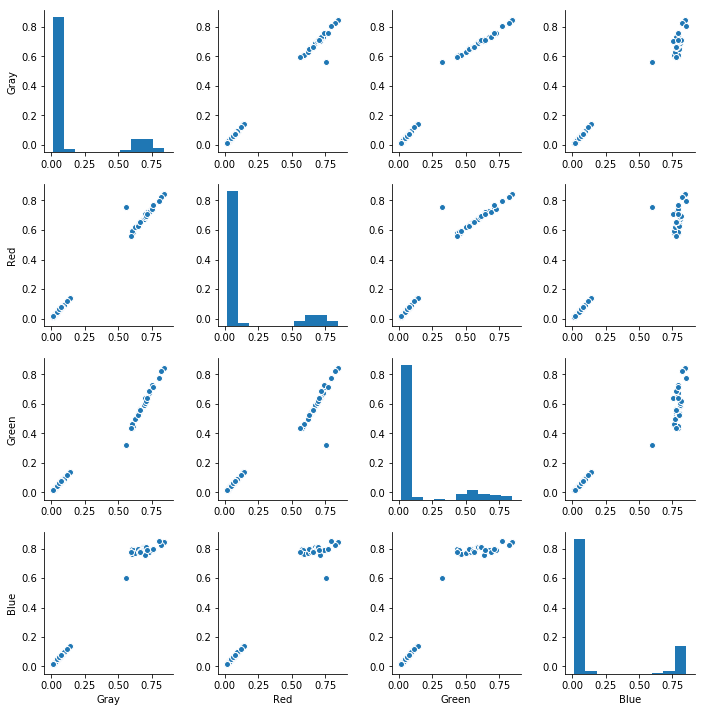

In [12]:
import matplotlib.pyplot as plt 
train_img_df['Red'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]))
train_img_df['Green'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,1]))
train_img_df['Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,2]))
train_img_df['Gray'] = train_img_df['images'].map(lambda x: np.mean(x))
#train_img_df['Red-Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]-x[:,:,2]))
#sns.pairplot(train_img_df[['Gray', 'Red', 'Green', 'Blue', 'Red-Blue']])
sns.pairplot(train_img_df[['Gray', 'Red', 'Green', 'Blue']])
plt.show()

# CNN model 1

In [13]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda,Dense,MaxPooling2D, Flatten

In [14]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))

cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))

cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))

cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))
# the final processing
cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0         
__________

In [20]:
#  compile the model
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer= keras.optimizers.Adadelta(),
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])

In [16]:
# fit
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 100)

Epoch 1/100
169/169 [==============================] - 228s 1s/step - loss: 0.0775 - dice_coef: 0.5038 - acc: 0.9059 - mean_squared_error: 0.0775
Epoch 2/100
169/169 [==============================] - 189s 1s/step - loss: 0.0570 - dice_coef: 0.5823 - acc: 0.9263 - mean_squared_error: 0.0570
Epoch 3/100
169/169 [==============================] - 218s 1s/step - loss: 0.0539 - dice_coef: 0.6079 - acc: 0.9307 - mean_squared_error: 0.0539
Epoch 4/100
169/169 [==============================] - 229s 1s/step - loss: 0.0523 - dice_coef: 0.6191 - acc: 0.9332 - mean_squared_error: 0.0523
Epoch 5/100
169/169 [==============================] - 234s 1s/step - loss: 0.0513 - dice_coef: 0.6257 - acc: 0.9348 - mean_squared_error: 0.0513
Epoch 6/100
169/169 [==============================] - 234s 1s/step - loss: 0.0505 - dice_coef: 0.6307 - acc: 0.9362 - mean_squared_error: 0.0505
Epoch 7/100
169/169 [==============================] - 237s 1s/step - loss: 0.0497 - dice_coef: 0.6350 - acc: 0.9374 - mean_

169/169 [==============================] - 277s 2s/step - loss: 0.0406 - dice_coef: 0.7199 - acc: 0.9519 - mean_squared_error: 0.0406
Epoch 57/100
169/169 [==============================] - 223s 1s/step - loss: 0.0406 - dice_coef: 0.7202 - acc: 0.9520 - mean_squared_error: 0.0406
Epoch 58/100
169/169 [==============================] - 221s 1s/step - loss: 0.0405 - dice_coef: 0.7206 - acc: 0.9520 - mean_squared_error: 0.0405
Epoch 59/100
169/169 [==============================] - 206s 1s/step - loss: 0.0405 - dice_coef: 0.7208 - acc: 0.9521 - mean_squared_error: 0.0405
Epoch 60/100
169/169 [==============================] - 205s 1s/step - loss: 0.0405 - dice_coef: 0.7212 - acc: 0.9521 - mean_squared_error: 0.0405
Epoch 61/100
169/169 [==============================] - 210s 1s/step - loss: 0.0404 - dice_coef: 0.7215 - acc: 0.9522 - mean_squared_error: 0.0404
Epoch 62/100
169/169 [==============================] - 223s 1s/step - loss: 0.0404 - dice_coef: 0.7218 - acc: 0.9523 - mean_square

In [21]:
# fit
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

loss_history = cnn.fit_generator(gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 30)

Epoch 1/30
169/169 [==============================] - 356s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 2/30
169/169 [==============================] - 316s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 3/30
169/169 [==============================] - 285s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 4/30
169/169 [==============================] - 305s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 5/30
169/169 [==============================] - 354s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 6/30
169/169 [==============================] - 327s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 7/30
169/169 [==============================] - 299s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


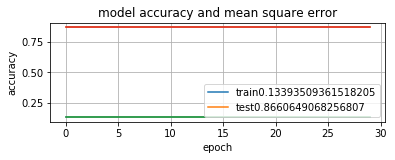

TypeError: 'function' object is not subscriptable

In [23]:
# model 1
##########################################
acc=loss_history.history['acc']
mean_squared_error =loss_history.history['mean_squared_error']
loss=loss_history.history['loss']
val_loss=loss_history.history['dice_coef']

plt.subplot(2,1,1)
plt.plot(loss_history.history['acc'])
plt.plot(loss_history.history['mean_squared_error'])
plt.title('model accuracy and mean square error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' + str(acc[-1]),'test' + str(mean_squared_error[-1])],loc='lower right')
plt.grid(True)
plt.show()

plt.subplot(2,1,2)
plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['dice_coef'])
plt.title('loss and dice_coef')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' + str(loss[-1]),'test' + str(dice_coef[-1])],loc='upper right')
plt.grid(True)
plt.show()

### masks and the train data

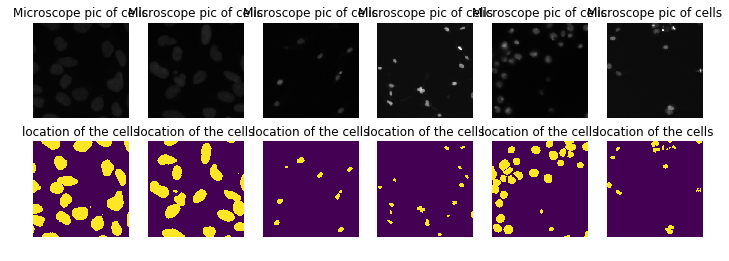

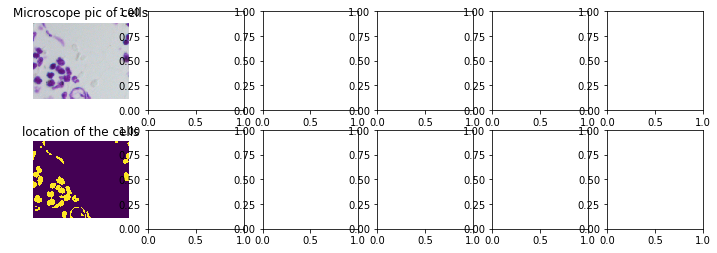

In [34]:
# predict the location of the cells
n_img = 6
fig, m_axs = plt.subplots(2, n_img, figsize = (12, 4))
for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), 
                                     m_axs.T):
    c_im.imshow(c_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope pic of cells')
    
    c_lab.imshow(c_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('location of the cells')
    for i in range(6):
        plt.show()

# apply the trained model to the testing data

In [55]:
# create the test dataset
def read_stack(img_list):
    return np.sum(np.stack([imread(c_img) for c_img in  img_list],0),0)/255.0

%time
channels=3
test_df = pathname_df.query('TrainingSplit=="test"')
test_rows = []
group_cols = ['Stage', 'ImgId']
for n_group, n_rows in test_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['images'] = n_rows.query('ImageType == "images"')['PathName'].values.tolist()
    test_rows += [c_row]
test_img_df = pd.DataFrame(test_rows)    

test_img_df['images'] = test_img_df['images'].map(read_stack).map(lambda x: x[:,:,:channels])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)

Wall time: 0 ns
65 images to process


,ImgId,Stage,images
51,c8e79ff4ac55f4b772057de28e539727b7f4f2a3de73bf...,stage1,"[[[0.8901960784313725, 0.9058823529411765, 0.7..."


In [57]:
# appply the model to test data
%time
test_img_df['masks'] = test_img_df['images'].map(lambda x: cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])

Wall time: 0 ns


# The predict results on test data

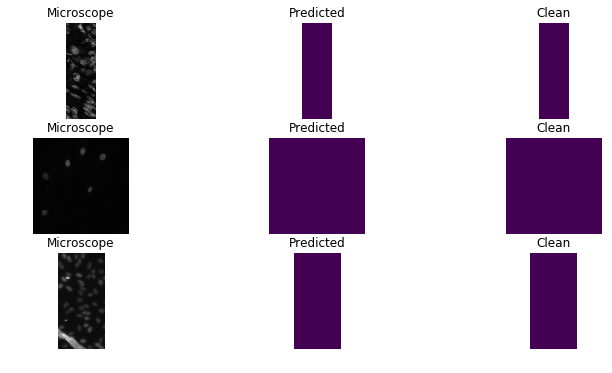

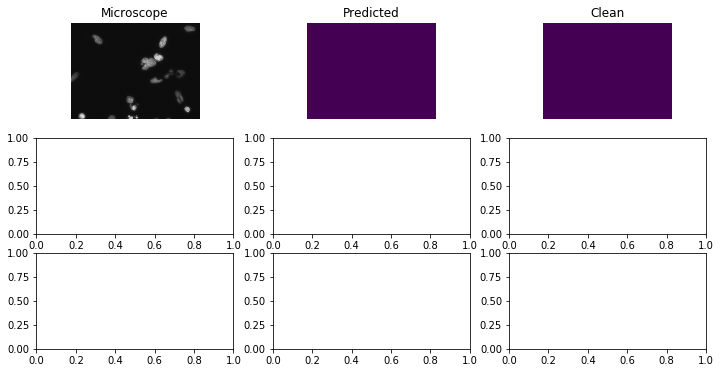

In [63]:
n_img = 3
from skimage.morphology import closing, opening, disk
def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))
fig, m_axs = plt.subplots(3, n_img, figsize = (12, 6))
for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), 
                                     m_axs):
    c_im.imshow(d_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')
    
    c_clean.imshow(clean_img(d_row['masks']))
    c_clean.axis('off')
    c_clean.set_title('Clean')
    for i in range(3):
        plt.show()

#  CNN model 2

In [82]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))
#initialize 

cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1, padding = 'same'))
####################################### add dropout layer
#cnn.add(Flatten(3))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'same'))
model.add(Dropout(0.5))

cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same',activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2),strides=1, padding = 'same'))
model.add(Dropout(0.5))

cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))

cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2), strides=1, padding = 'same'))


cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))

cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'relu'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
dense_23 (Dense)             (None, None, None, 64)    256       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, None, None, 8)     4616      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, None, None, 8)     0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, None, None, 8)     0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, None, None, 16)    1168      
__________

# model explain
in this model, I add more layers as dropout, because the accuracy in the last model reached the summit after 10 epochs, Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.
1. add a droupout layer after each Conv2D layer
2. change activation fnction into relu

In [ ]:
# complie 
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer= keras.optimizers.Adadelta(),
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])

# fit
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 20)


Epoch 1/20
169/169 [==============================] - 358s 2s/step - loss: 0.1552 - dice_coef: 0.1579 - acc: 0.8661 - mean_squared_error: 0.1552
Epoch 2/20
169/169 [==============================] - 340s 2s/step - loss: 0.1162 - dice_coef: 0.1171 - acc: 0.8661 - mean_squared_error: 0.1162
Epoch 3/20
169/169 [==============================] - 373s 2s/step - loss: 0.1161 - dice_coef: 0.1129 - acc: 0.8661 - mean_squared_error: 0.1161
Epoch 4/20
169/169 [==============================] - 352s 2s/step - loss: 0.1161 - dice_coef: 0.1126 - acc: 0.8661 - mean_squared_error: 0.1161
Epoch 5/20
169/169 [==============================] - 356s 2s/step - loss: 0.1161 - dice_coef: 0.1125 - acc: 0.8661 - mean_squared_error: 0.1161
Epoch 6/20
169/169 [==============================] - 359s 2s/step - loss: 0.1161 - dice_coef: 0.1125 - acc: 0.8661 - mean_squared_error: 0.1161
Epoch 7/20
169/169 [==============================] - 331s 2s/step - loss: 0.1161 - dice_coef: 0.1125 - acc: 0.8661 - mean_squared

## The purpose of training process is to make the model learn, what kind of pixel is inside the cell, and what kind of pixel is the background(outside of the cell).
## It is the classification problem, to classify each pixel into two classes.
## use the model to predict the class of each pixel, and store the prediction in a Run Length  Encoding file.
## then use the plot to show this RLE file and we can see the black-white image that can indicate the location of 'cells'

# Result analysis:

It is weird that the accuracy is stable at 0.8661 and got rised at the last epoch.The explaination of this is we used the relu and there are only two classes in this problem, the relu will filter out all the negative values and reserve the psotive value and after each epoch, the training result will keep the same.


## CNN model 3

In [24]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))
#initialize 
cnn.add(Dense(64,
             kernel_initializer='zeros',
             bias_initializer='zeros',
             kernel_regularizer=None,
             bias_regularizer=None,
             ))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1, padding = 'same'))
####################################### add dropout layer
#cnn.add(Flatten(3))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'same'))
#model.add(Dropout(0.5))

cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same',activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2),strides=1, padding = 'same'))
#model.add(Dropout(0.5))

cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))

cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same', activation='relu'))
#cnn.add(MaxPooling2D(pool_size=(2,2), strides=1, padding = 'same'))


cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))

cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'softmax'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
dense_2 (Dense)              (None, None, None, 64)    256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, None, None, 8)     4616      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, None, None, 8)     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, None, None, 16)    2320      
__________

# model explain
1. add a dense layer, where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True
2. change the activation function into softmax 

In [25]:
#  dice loss, model need to be compile before use
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer='adam',
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])


In [26]:
# train the model
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(),
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 10)


Epoch 1/10
169/169 [==============================] - 309s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 2/10
169/169 [==============================] - 269s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 3/10
169/169 [==============================] - 315s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 4/10
169/169 [==============================] - 279s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 5/10
169/169 [==============================] - 296s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 6/10
169/169 [==============================] - 290s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared_error: 0.8661
Epoch 7/10
169/169 [==============================] - 279s 2s/step - loss: 0.8661 - dice_coef: 0.2221 - acc: 0.1339 - mean_squared

## Gradient estimation 
## optimizer change from Adadelta to Adam

In [37]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))
#initialize 
cnn.add(Dense(64,
             kernel_initializer='zeros',
             bias_initializer='zeros',
             kernel_regularizer=None,
             bias_regularizer=None,
             ))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
# use dilations to get a slightly larger field of view
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))
# pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))
# the final processing
cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
dense_5 (Dense)              (None, None, None, 64)    256       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, None, None, 8)     4616      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, None, None, 32)    4640      
__________

In [38]:
#  dice loss, model need to be compile before use
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer='adam',
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])
#21:00-21:35

In [30]:
# train the model
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(),
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 5)


Epoch 1/5
169/169 [==============================] - 278s 2s/step - loss: 0.1339 - dice_coef: 2.4929e-04 - acc: 0.8661 - mean_squared_error: 0.1339
Epoch 2/5
169/169 [==============================] - 282s 2s/step - loss: 0.1339 - dice_coef: 2.4929e-04 - acc: 0.8661 - mean_squared_error: 0.1339
Epoch 3/5
169/169 [==============================] - 282s 2s/step - loss: 0.1339 - dice_coef: 2.4929e-04 - acc: 0.8661 - mean_squared_error: 0.1339
Epoch 4/5
169/169 [==============================] - 281s 2s/step - loss: 0.1339 - dice_coef: 2.4929e-04 - acc: 0.8661 - mean_squared_error: 0.1339
Epoch 5/5
169/169 [==============================] - 320s 2s/step - loss: 0.1339 - dice_coef: 2.4929e-04 - acc: 0.8661 - mean_squared_error: 0.1339


## Network Architecture 
# remove the dens layer and the maxpolling2D layer

In [31]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))
#initialize 

cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
# use dilations to get a slightly larger field of view
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))
# pooling layer

# the final processing
cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, None, None, 8)     224       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, None, None, 16)    528       
__________

In [32]:
#  dice loss, model need to be compile before use
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer= keras.optimizers.Adadelta(),
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])

In [33]:
# train the model
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(),
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 5)
#21:37-21:45

Epoch 1/5
169/169 [==============================] - 145s 860ms/step - loss: 0.1004 - dice_coef: 0.4695 - acc: 0.8768 - mean_squared_error: 0.1004
Epoch 2/5
169/169 [==============================] - 132s 784ms/step - loss: 0.0662 - dice_coef: 0.5471 - acc: 0.9182 - mean_squared_error: 0.0662
Epoch 3/5
169/169 [==============================] - 153s 905ms/step - loss: 0.0610 - dice_coef: 0.5720 - acc: 0.9224 - mean_squared_error: 0.0610
Epoch 4/5
169/169 [==============================] - 138s 816ms/step - loss: 0.0568 - dice_coef: 0.5989 - acc: 0.9265 - mean_squared_error: 0.0568
Epoch 5/5
169/169 [==============================] - 136s 806ms/step - loss: 0.0551 - dice_coef: 0.6105 - acc: 0.9288 - mean_squared_error: 0.0551


## Network initialization 
## initialization changes from zeros into random uniform

In [34]:
# build cnn model
#Conv1D,ConV2D,stride=1 defalut
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
cnn = Sequential()
cnn.add(BatchNormalization(input_shape = (None, None, img_channels), 
                                  name = 'NormalizeInput'))
#initialize 
cnn.add(Dense(64,
             kernel_initializer='random_uniform',
             bias_initializer='random_uniform',
             kernel_regularizer=None,
             bias_regularizer=None,
             ))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
# use dilations to get a slightly larger field of view
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))
# pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2), strides=1,padding = 'same'))
# the final processing
cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
dense_4 (Dense)              (None, None, None, 64)    256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, None, None, 8)     4616      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, None, None, 8)     584       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, None, None, 32)    4640      
__________

In [35]:
#  dice loss, model need to be compile before use
from keras import backend as K
import keras
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
cnn.compile(
             optimizer= keras.optimizers.Adadelta(),
                   loss='mean_squared_error', 
                   metrics = [dice_coef, 'acc', 'mse'])

In [36]:
# train the model
def gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

cnn.fit_generator(gen(),
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 5)
#21:49-22:15

Epoch 1/5
169/169 [==============================] - 317s 2s/step - loss: 0.0768 - dice_coef: 0.5363 - acc: 0.9136 - mean_squared_error: 0.0768
Epoch 2/5
169/169 [==============================] - 293s 2s/step - loss: 0.0663 - dice_coef: 0.6059 - acc: 0.9248 - mean_squared_error: 0.0663
Epoch 3/5
169/169 [==============================] - 301s 2s/step - loss: 0.0644 - dice_coef: 0.6199 - acc: 0.9277 - mean_squared_error: 0.0644
Epoch 4/5
169/169 [==============================] - 300s 2s/step - loss: 0.0631 - dice_coef: 0.6305 - acc: 0.9293 - mean_squared_error: 0.0631
Epoch 5/5
169/169 [==============================] - 291s 2s/step - loss: 0.0622 - dice_coef: 0.6401 - acc: 0.9305 - mean_squared_error: 0.0622
